<a href="https://colab.research.google.com/github/hanatran77/similarity-glowing-parakeet/blob/main/PubMedBERT__T2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from torch.nn.functional import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# New Section

In [ ]:
# Load your CSV gene list
file_path = "/content/PubMedBERT_DEGs.csv"  # Make sure this file is in the same directory
df = pd.read_csv(file_path)
df

,Gene Symbol,Regulation,Description
0,AARS2,down,"alanyl-tRNA synthetase 2, mitochondrial"
1,ABCB6,down,ATP binding cassette subfamily B member 6 (Lan...
2,ABCG1,down,ATP binding cassette subfamily G member 1
3,ACOXL,down,acyl-CoA oxidase-like
4,ACP6,down,"acid phosphatase 6, lysophosphatidic"
...,...,...,...
579,ZNF747,up,zinc finger protein 747
580,ZNF765,down,zinc finger protein 765
581,ZNF827,down,zinc finger protein 827
582,ZP3,down,POM121 and ZP3 fusion; zona pellucida glycopro...


In [ ]:
# Load PubMedBERT model
print("Loading PubMedBERT...")
tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract")
model = AutoModel.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract")

Loading PubMedBERT...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Function to get average pooled embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1)

In [ ]:
# Generate query embedding-T2D
query_text = "Type 2 Diabetes"
query_embed = get_embedding(query_text)

In [ ]:
# Generate query embedding-MT
query_text_1 = "Mitochondrial dysfunction"
query_embed_1 = get_embedding(query_text_1)

In [ ]:
# Initialize score list-T2D
gene_scores = []
# Compute similarity-for several categories
for _, row in df.iterrows():
    gene = row['Gene Symbol']
    regulation = row.get('Regulation', '')
    func = row.get('Description', '')

    # Construct enhanced sentence
    sentence = (
        f"The gene {gene} with {regulation} regulation functions as: "
        f"{func}. It may be associated with Type 2 Diabetes."
        #f"{func}. It may be associated with Mitochondrial dysfunction."
    )

    # Get embedding and similarity score
    emb = get_embedding(sentence)
    score = cosine_similarity(query_embed, emb)[0][0]
    gene_scores.append(score)

In [ ]:
# Append results-T2D
df["T2D_Similarity_Score"] = gene_scores
df_sorted = df.sort_values(by="T2D_Similarity_Score", ascending=False)
df_sorted

,Gene Symbol,Regulation,Description,T2D_Similarity_Score
425,PTK2,down,protein tyrosine kinase 2,0.882619
134,DPP3,down,dipeptidyl-peptidase 3,0.882272
346,MTFR2,down,mitochondrial fission regulator 2,0.881408
198,HDLBP,down,high density lipoprotein binding protein,0.881288
555,VWF,up,von Willebrand factor,0.880918
...,...,...,...,...
272,LOC100132062,down,long intergenic non-protein coding RNA 1000; l...,0.805546
275,LOC100133331,down,long intergenic non-protein coding RNA 1000; l...,0.805029
298,LOC105373249,down,long intergenic non-protein coding RNA 1000; l...,0.804853
288,LOC102723580,down,long intergenic non-protein coding RNA 1000; l...,0.802236


In [ ]:
# Get embedding and similarity score
# Initialize score list-MT
gene_scores_1 = []
# Compute similarity-for several categories
for _, row in df.iterrows():
    gene = row['Gene Symbol']
    regulation = row.get('Regulation', '')
    func = row.get('Description', '')

    # Construct enhanced sentence
    sentence_1 = (
        f"The gene {gene} with {regulation} regulation functions as: "
        #f"{func}. It may be associated with Type 2 Diabetes."
        f"{func}. It may be associated with Mitochondrial dysfunction."
    )

    # Get embedding and similarity score
    emb_1 = get_embedding(sentence_1)
    score_1 = cosine_similarity(query_embed_1, emb_1)[0][0]
    gene_scores_1.append(score_1)

In [ ]:
# Append results-MTD
df["MT_Dysfunction_Similarity_Score"] = gene_scores_1
df_sorted_1 = df.sort_values(by="MT_Dysfunction_Similarity_Score", ascending=False)
df_sorted_1

,Gene Symbol,Regulation,Description,T2D_Similarity_Score,MT_Dysfunction_Similarity_Score
346,MTFR2,down,mitochondrial fission regulator 2,0.881408,0.919369
318,MATR3,down,matrin 3,0.874628,0.918613
565,YARS,down,tyrosyl-tRNA synthetase,0.879315,0.918282
321,MCM10,down,minichromosome maintenance 10 replication init...,0.873346,0.918277
550,VAPA,up,VAMP associated protein A,0.875424,0.917658
...,...,...,...,...,...
273,LOC100132287,down,long intergenic non-protein coding RNA 1000; l...,0.805758,0.859763
275,LOC100133331,down,long intergenic non-protein coding RNA 1000; l...,0.805029,0.859603
298,LOC105373249,down,long intergenic non-protein coding RNA 1000; l...,0.804853,0.859439
288,LOC102723580,down,long intergenic non-protein coding RNA 1000; l...,0.802236,0.857661


In [ ]:
# Save results
#output_path = "ranked_genes_T2D_similarity.csv"
#df_sorted.to_csv(output_path, index=False)
#print(f"\nTop genes related to Type 2 Diabetes saved to: {output_path}")

output_path = "ranked_genes_similarity_3.csv"
df_sorted_1.to_csv(output_path, index=False)
print(f"\nTop genes related to Mitochondrial Dysfunction saved to: {output_path}")


Top genes related to Mitochondrial Dysfunction saved to: ranked_genes_similarity_3.csv


In [ ]:
# Display top results
#print(df_sorted[["Gene_Symbol", "Regulation", "T2D_Similarity_Score"]].head(46))
print(df_sorted[["Gene_Symbol", "Regulation", "MT_Dysfunction_Similarity_Score", "T2D_Similarity_Score"]].head(46))


     Gene_Symbol Regulation  MT_Dysfunction_Similarity_Score  \
32        NMNAT3       down                         0.911291   
23         ISOC1       down                         0.904374   
29         MED20       down                         0.895810   
19         GRIK1       down                         0.892057   
14       EP400NL       down                         0.892285   
30         NAMPT         up                         0.890829   
25        KLHDC1       down                         0.894986   
37          PTK2       down                         0.886483   
2        ARHGAP9         up                         0.885032   
36          PPT2       down                         0.889347   
35          POLQ       down                         0.889033   
39          VWA8       down                         0.891243   
4          BARD1       down                         0.888794   
16          ERI2       down                         0.889938   
42       ZNF252P       down             

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Now filtering should work
filtered_combined = df_sorted_1[
    (df_sorted_1["T2D_Similarity_Score"] > 0.864) |
    (df_sorted_1["MT_Dysfunction_Similarity_Score"] > 0.907)
]
filtered_combined

,Gene Symbol,Regulation,Description,T2D_Similarity_Score,MT_Dysfunction_Similarity_Score
346,MTFR2,down,mitochondrial fission regulator 2,0.881408,0.919369
318,MATR3,down,matrin 3,0.874628,0.918613
565,YARS,down,tyrosyl-tRNA synthetase,0.879315,0.918282
321,MCM10,down,minichromosome maintenance 10 replication init...,0.873346,0.918277
550,VAPA,up,VAMP associated protein A,0.875424,0.917658
...,...,...,...,...,...
400,PHOSPHO2,down,"phosphatase, orphan 2",0.864838,0.903926
554,VWA8,down,von Willebrand factor A domain containing 8,0.864239,0.903746
398,PGAM2,down,phosphoglycerate mutase 2 (muscle),0.871366,0.903567
234,INTU,down,inturned planar cell polarity protein,0.866861,0.903326


In [ ]:
output_path = "FILTERED_ranked_genes_similarity_3.csv"
filtered_combined.to_csv(output_path, index=False)
print(f"\nTop genes related to Mitochondrial Dysfunction & T2D saved to: {output_path}")


Top genes related to Mitochondrial Dysfunction & T2D saved to: FILTERED_ranked_genes_similarity_3.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set gene symbol as index
# Set gene symbol as index
heatmap_df = filtered_combined[["Gene Symbol", "T2D_Similarity_Score", "MT_Dysfunction_Similarity_Score"]].set_index("Gene Symbol")
# heatmap_df_MT = filtered_combined[["Gene_Symbol",
# "MT_Dysfunction_Similarity_Score"]].set_index("Gene_Symbol")
# %% Plot heatmap

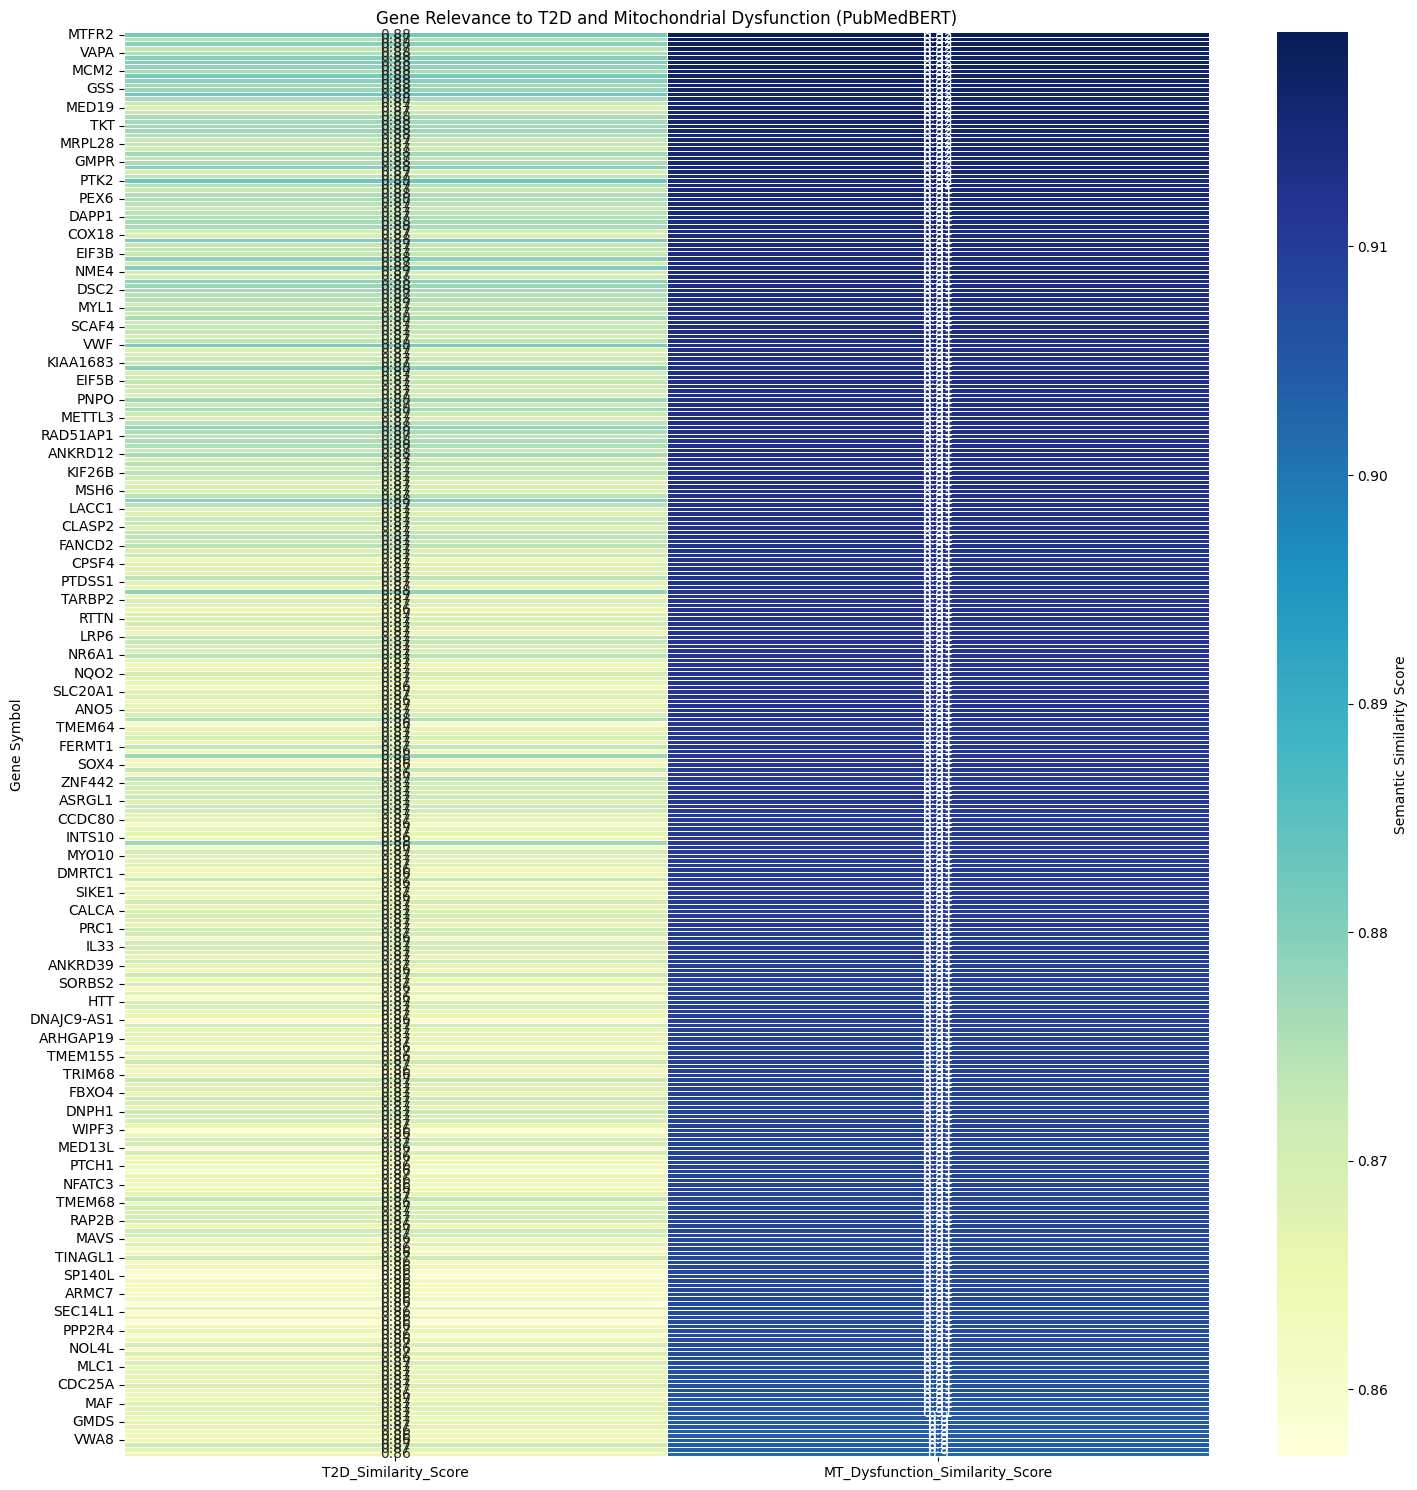

In [ ]:
# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", cbar_kws={"label": "Semantic Similarity Score"}, linewidths=0.7)
plt.title("Gene Relevance to T2D and Mitochondrial Dysfunction (PubMedBERT)")
#plt.ylabel("Gene Symbol")
plt.tight_layout()
plt.show()

In [ ]:
# Filter genes with similarity > 0.82
filtered_df = df_sorted[df_sorted["T2D_Similarity_Score"] > 0.815]

In [ ]:
# Sort for better visualization
filtered_df = filtered_df.sort_values(by="T2D_Similarity_Score", ascending=False)

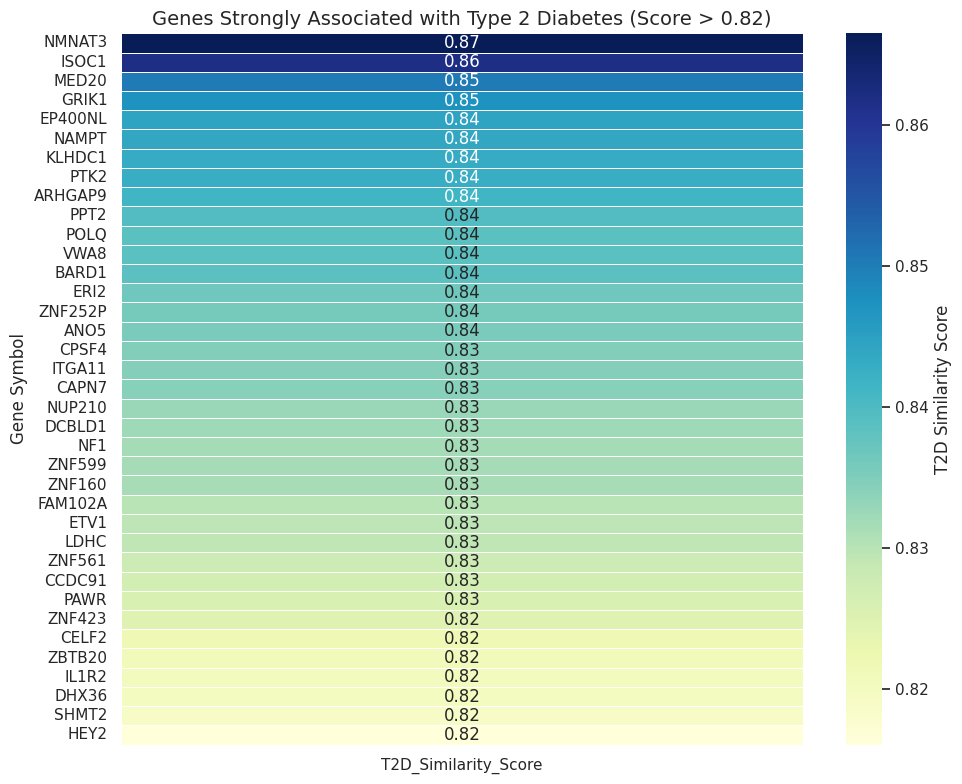

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
heatmap = sns.heatmap(
    filtered_df[["T2D_Similarity_Score"]].set_index(filtered_df["Gene_Symbol"]),
    annot=True,
    cmap="YlGnBu",
    cbar_kws={'label': 'T2D Similarity Score'},
    linewidths=0.6
)

plt.title("Genes Strongly Associated with Type 2 Diabetes (Score > 0.82)", fontsize=14)
plt.xlabel("")
plt.ylabel("Gene Symbol")
plt.tight_layout()
plt.show()

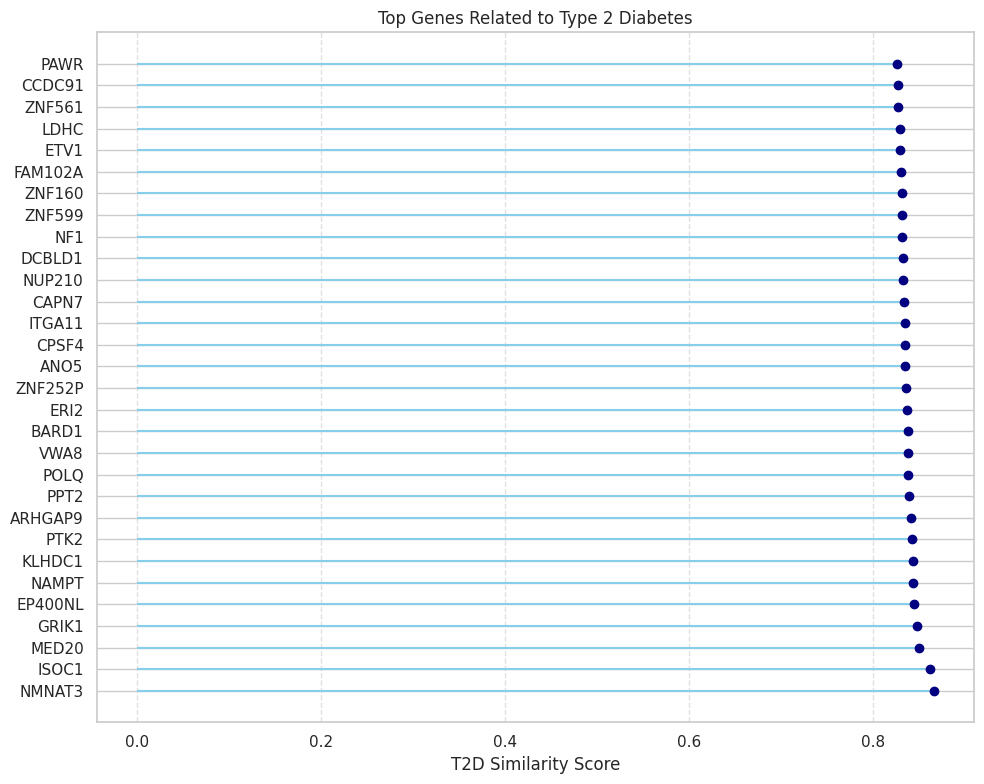

In [ ]:
#LOLLIPOP PLOT
top_genes = df.sort_values(by="T2D_Similarity_Score", ascending=False).head(30)

plt.figure(figsize=(10, 8))
plt.hlines(y=top_genes['Gene_Symbol'], xmin=0, xmax=top_genes['T2D_Similarity_Score'], color='skyblue')
plt.plot(top_genes['T2D_Similarity_Score'], top_genes['Gene_Symbol'], 'o', color='navy')
plt.xlabel('T2D Similarity Score')
plt.title('Top Genes Related to Type 2 Diabetes')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

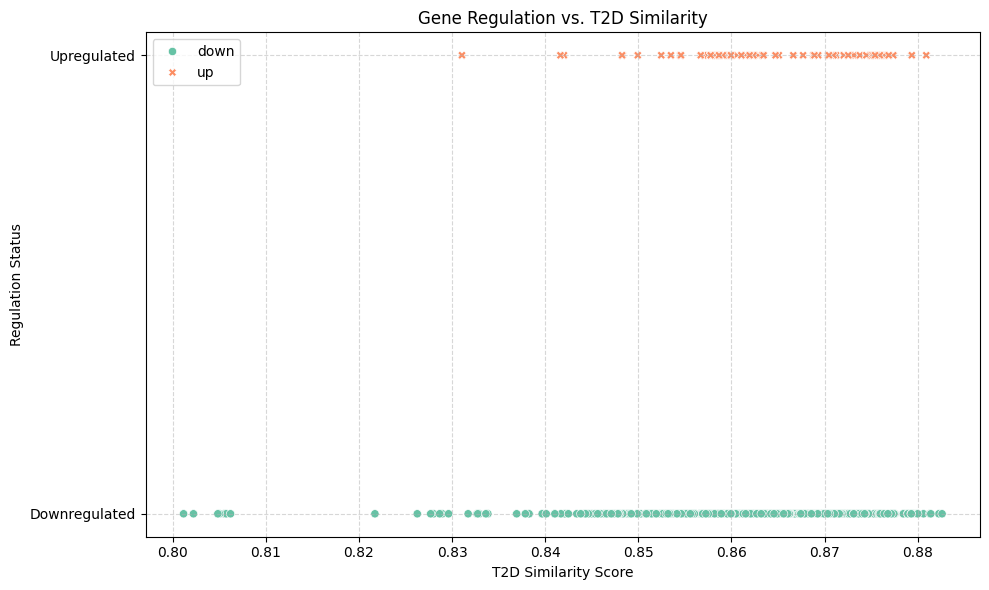

In [ ]:
#VOLCANO-LIKE PLOT
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="T2D_Similarity_Score",
    y=[-1 if reg == 'down' else 1 for reg in df["Regulation"]],
    hue="Regulation",
    style="Regulation",
    data=df,
    palette="Set2"
)
plt.yticks([-1, 1], ['Downregulated', 'Upregulated'])
# plt.axvline(0.82, linestyle='--', color='gray', label='Threshold')
plt.title("Gene Regulation vs. T2D Similarity")
plt.xlabel("T2D Similarity Score")
plt.ylabel("Regulation Status")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
#CLUSTERED HEATMAP BY REGULATION
# Add regulation as numeric
# Check
if filtered.shape[0] < 2:
    print(f"⚠️ Not enough genes with score > {threshold} to create a clustermap.")
else:
    # Map regulation color
    row_colors = filtered["Regulation"].map({'up': 'orange', 'down': 'lightblue'})

    # Create clustermap
    sns.clustermap(
        filtered[["T2D_Similarity_Score"]],
        row_colors=row_colors,
        cmap="vlag",
        linewidths=0.5,
        figsize=(8, 10),
        dendrogram_ratio=(0.1, 0.2),
        cbar_pos=(0.02, 0.8, 0.03, 0.18)
    )
    plt.suptitle("Clustermap of Genes with T2D Similarity > 0.82", y=1.05)
    plt.show()

NameError: name 'filtered' is not defined

In [ ]:
#INTERACTIVE PLOT
import plotly.express as px

fig = px.scatter(
    df[df["T2D_Similarity_Score"] > 0.82],
    x="T2D_Similarity_Score",
    y="Gene_Symbol",
    color="Regulation",
    hover_data=["Function"],
    title="T2D-Related Genes by Semantic Similarity"
)
fig.show()

In [ ]:
# Load your CSV gene list
import pandas as pd
file_path_TRIAL = "/content/GO_terms_LLM_2nd trial.txt"  # Make sure this file is in the same directory
df_TRIAL = pd.read_csv(file_path_TRIAL, delimiter='\t')
df_TRIAL

,Term,PValue
0,PHARMACOGENOMIC,0.001171
1,CARDIOVASCULAR,0.018180
2,OTHER,0.026006
3,REPRODUCTION,0.032766
4,NEUROLOGICAL,0.050359
...,...,...
97,R-HSA-6784531~tRNA processing in the nucleus,0.050181
98,R-HSA-400253~Circadian Clock,0.058458
99,R-HSA-72202~Transport of Mature Transcript to ...,0.071566
100,R-HSA-72306~tRNA processing,0.090920


from matplotlib import pyplot as plt
df_TRIAL['PValue'].plot(kind='hist', bins=20, title='PValue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_TRIAL['PValue'].plot(kind='line', figsize=(8, 4), title='PValue')
plt.gca().spines[['top', 'right']].set_visible(False)